In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import bipartite
from networkx.generators.random_graphs import erdos_renyi_graph
import copy

In [2]:
# -- Initialize graphs
seed = 30
G = nx.florentine_families_graph()
nodes = G.nodes()

layout = nx.spring_layout(G, seed=seed)

In [3]:
Nnodes = len(nodes)

# map node index to its name
MapNode = {}
for i in range(Nnodes):
    MapNode[i] = list(nodes)[i]
    
# adjacency matrix
A = np.zeros((Nnodes, Nnodes))

for i in range(Nnodes):
    for j in range(i+1, Nnodes):
        if ((MapNode[i], MapNode[j]) in list(G.edges)) or ((MapNode[j], MapNode[i]) in list(G.edges)):
            A[i,j], A[j,i] = 1, 1

In [4]:
# compute commen neighbour and total distinct
Common = np.zeros((Nnodes, Nnodes))
Total = np.zeros((Nnodes, Nnodes))

# common neighbours = A[i]@A[j]
for i in range(Nnodes):
    for j in range(i+1, Nnodes):
        Common[i,j] = Common[j,i] = A[i]@A[j]


# total neighbours = i neighbours + j neibours - common neighbours
for i in range(Nnodes):
    for j in range(i+1, Nnodes):
        Total[i,j] = Total[j,i] = sum(A[i]) + sum(A[j]) - Common[i,j]
        

In [5]:
# compute similarity
Similar = np.zeros((Nnodes, Nnodes))

# add tuples containing similarity
# similarity = common/total 
pred = []
for i in range(Nnodes):
    for j in range(i+1, Nnodes):
        Similar[i,j] = Similar[j,i] = Common[i,j]/Total[i,j]
        pred.append((MapNode[i], MapNode[j], Similar[i,j]))

In [6]:
# -- keep a copy of edges in the graph
old_edges = copy.deepcopy(G.edges())

In [7]:
# -- add new edges representing similarities.
new_edges, metric = [], []
for u, v, p in pred:
    G.add_edge(u, v)
    print(f"({u}, {v}) -> {p:.8f}")
    new_edges.append((u, v))
    metric.append(p)

(Acciaiuoli, Medici) -> 0.00000000
(Acciaiuoli, Castellani) -> 0.00000000
(Acciaiuoli, Peruzzi) -> 0.00000000
(Acciaiuoli, Strozzi) -> 0.00000000
(Acciaiuoli, Barbadori) -> 0.50000000
(Acciaiuoli, Ridolfi) -> 0.33333333
(Acciaiuoli, Tornabuoni) -> 0.33333333
(Acciaiuoli, Albizzi) -> 0.33333333
(Acciaiuoli, Salviati) -> 0.50000000
(Acciaiuoli, Pazzi) -> 0.00000000
(Acciaiuoli, Bischeri) -> 0.00000000
(Acciaiuoli, Guadagni) -> 0.00000000
(Acciaiuoli, Ginori) -> 0.00000000
(Acciaiuoli, Lamberteschi) -> 0.00000000
(Medici, Castellani) -> 0.12500000
(Medici, Peruzzi) -> 0.00000000
(Medici, Strozzi) -> 0.11111111
(Medici, Barbadori) -> 0.00000000
(Medici, Ridolfi) -> 0.12500000
(Medici, Tornabuoni) -> 0.12500000
(Medici, Albizzi) -> 0.00000000
(Medici, Salviati) -> 0.00000000
(Medici, Pazzi) -> 0.16666667
(Medici, Bischeri) -> 0.00000000
(Medici, Guadagni) -> 0.25000000
(Medici, Ginori) -> 0.16666667
(Medici, Lamberteschi) -> 0.00000000
(Castellani, Peruzzi) -> 0.20000000
(Castellani, Strozz

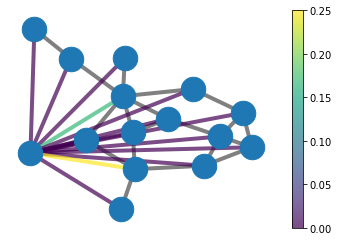

In [8]:
# -- plot Florentine Families graph
nx.draw_networkx_nodes(G, nodelist=nodes, label=nodes, pos=layout, node_size=600)
nx.draw_networkx_edges(G, edgelist=old_edges, pos=layout, edge_color='gray', width=4)


# add all edges containing ginori to a list
# add all similarity of ginori with neighbours to a list 
new_edges_ginori = []
metric_ginori = []
for i, term in enumerate(new_edges):
    if 'Ginori' in term:
        new_edges_ginori.append(new_edges[i])
        metric_ginori.append(metric[i])

# -- plot edges representing similarity
"""
    This example is randomly plotting similarities between 8 pairs of nodes in the graph. 
    Identify the ”Ginori”
"""
ne = nx.draw_networkx_edges(G, edgelist=new_edges_ginori, pos=layout, edge_color=np.asarray(metric_ginori), width=4, alpha=0.7)
plt.colorbar(ne)
plt.axis('off')
plt.show()